### Data Dictionary

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import _hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import keras
from keras.models import save_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense
from keras.optimizers import Adam

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

from tpot import TPOTClassifier, TPOTRegressor

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

### Data Exploration

In [2]:
df = pd.read_csv("WHO.csv")

In [3]:
df

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140.0,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820.0,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310.0,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Venezuela (Bolivarian Republic of),Americas,29955,28.84,9.17,2.44,75,15.3,97.78,NaN,12430.0,94.7,95.1
190,Viet Nam,Western Pacific,90796,22.87,9.32,1.79,75,23.0,143.39,93.2,3250.0,NaN,NaN
191,Yemen,Eastern Mediterranean,23852,40.72,4.54,4.35,64,60.0,47.05,63.9,2170.0,85.5,70.5
192,Zambia,Africa,14075,46.73,3.95,5.77,55,88.5,60.59,71.2,1490.0,91.4,93.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        194 non-null    object 
 1   Region                         194 non-null    object 
 2   Population                     194 non-null    int64  
 3   Under15                        194 non-null    float64
 4   Over60                         194 non-null    float64
 5   FertilityRate                  183 non-null    float64
 6   LifeExpectancy                 194 non-null    int64  
 7   ChildMortality                 194 non-null    float64
 8   CellularSubscribers            184 non-null    float64
 9   LiteracyRate                   103 non-null    float64
 10  GNI                            162 non-null    float64
 11  PrimarySchoolEnrollmentMale    101 non-null    float64
 12  PrimarySchoolEnrollmentFemale  101 non-null    flo

In [5]:
df.describe(include='all')

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
count,194,194,1.940000e+02,194.000000,194.000000,183.000000,194.000000,194.000000,184.000000,103.000000,162.000000,101.000000,101.000000
unique,194,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Luxembourg,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.635997e+04,28.732423,11.163660,2.940656,70.010309,36.148969,93.641522,83.710680,13320.925926,90.850495,89.632673
std,NaN,NaN,1.379031e+05,10.534573,7.149331,1.480984,9.259075,37.992935,41.400447,17.530645,15192.988650,11.017147,12.817614
min,NaN,NaN,1.000000e+00,13.120000,0.810000,1.260000,47.000000,2.200000,2.570000,31.100000,340.000000,37.200000,32.500000
25%,NaN,NaN,1.695750e+03,18.717500,5.200000,1.835000,64.000000,8.425000,63.567500,71.600000,2335.000000,87.700000,87.300000
50%,NaN,NaN,7.790000e+03,28.650000,8.530000,2.400000,72.500000,18.600000,97.745000,91.800000,7870.000000,94.700000,95.100000
75%,NaN,NaN,2.453525e+04,37.752500,16.687500,3.905000,76.000000,55.975000,120.805000,97.850000,17557.500000,98.100000,97.900000


In [6]:
df.shape

(194, 13)

In [7]:
df.columns

Index(['Country', 'Region', 'Population', 'Under15', 'Over60', 'FertilityRate',
       'LifeExpectancy', 'ChildMortality', 'CellularSubscribers',
       'LiteracyRate', 'GNI', 'PrimarySchoolEnrollmentMale',
       'PrimarySchoolEnrollmentFemale'],
      dtype='object')

### Data Visualization

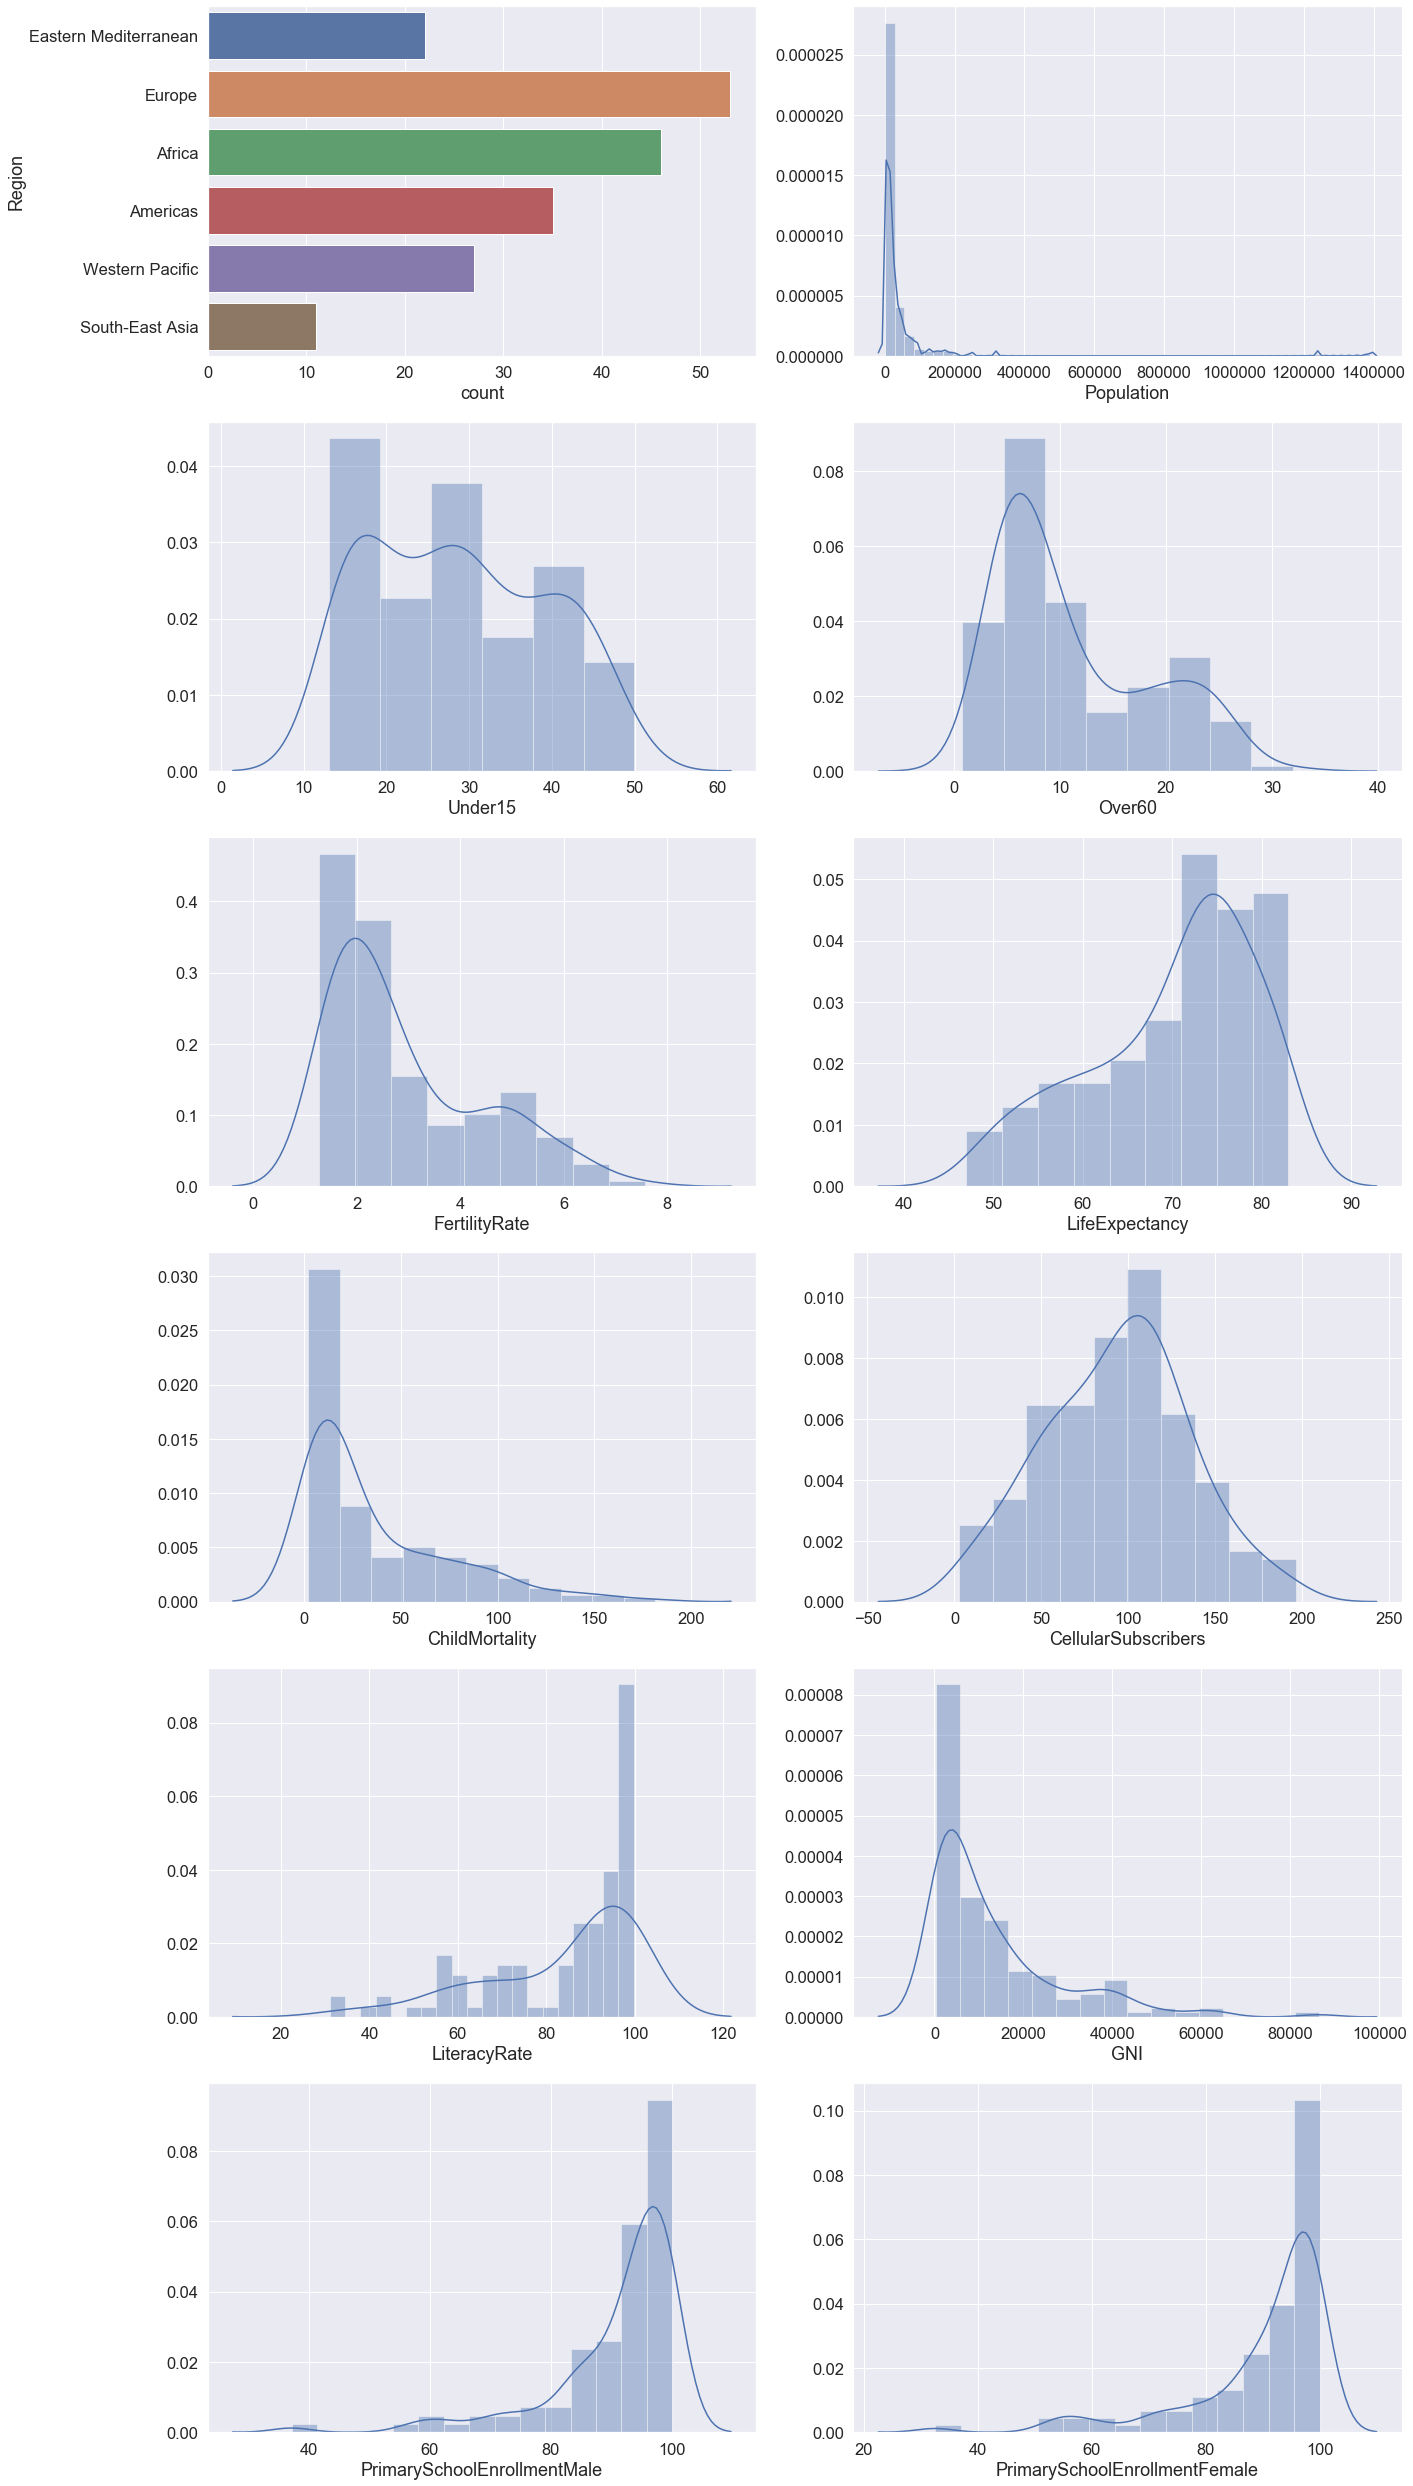

In [8]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.countplot(y = df.Region)
plt.subplot(7,2,2)
sns.distplot(df.Population)
plt.subplot(7,2,3)
sns.distplot(df.Under15)
plt.subplot(7,2,4)
sns.distplot(df.Over60)
plt.subplot(7,2,5)
sns.distplot(df.FertilityRate)
plt.subplot(7,2,6)
sns.distplot(df.LifeExpectancy)
plt.subplot(7,2,7)
sns.distplot(df.ChildMortality)
plt.subplot(7,2,8)
sns.distplot(df.CellularSubscribers)
plt.subplot(7,2,9)
sns.distplot(df.LiteracyRate, bins=20)
plt.subplot(7,2,10)
sns.distplot(df.GNI)
plt.subplot(7,2,11)
sns.distplot(df.PrimarySchoolEnrollmentMale)
plt.subplot(7,2,12)
sns.distplot(df.PrimarySchoolEnrollmentFemale)
# plt.subplot(7,2,13)
# sns.countplot()
# plt.subplot(7,2,14)
# sns.countplot()

plt.tight_layout()
plt.show()

### Bivariate Data Exploration

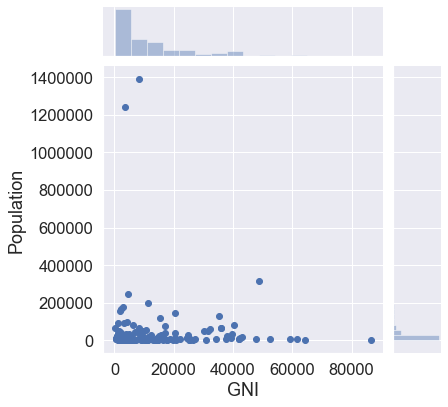

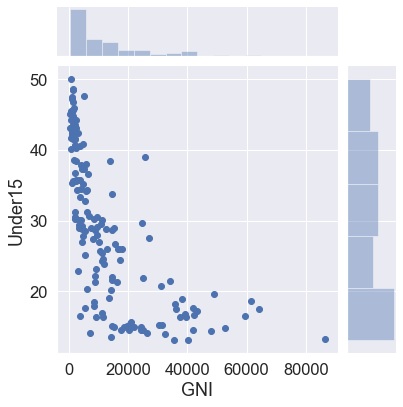

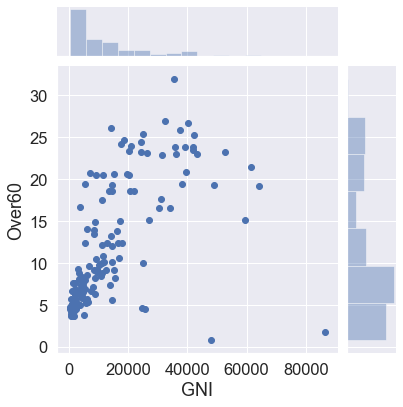

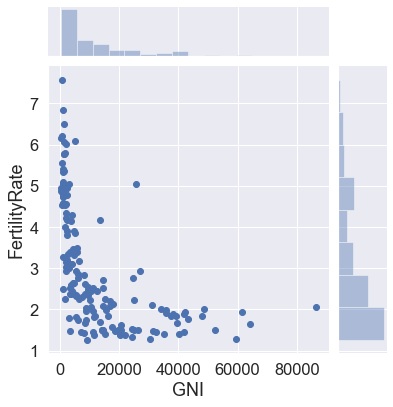

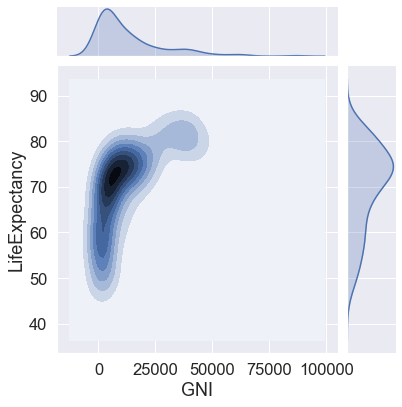

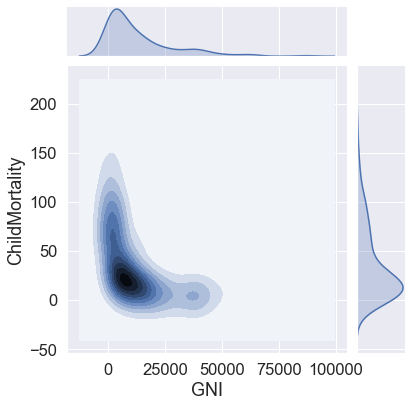

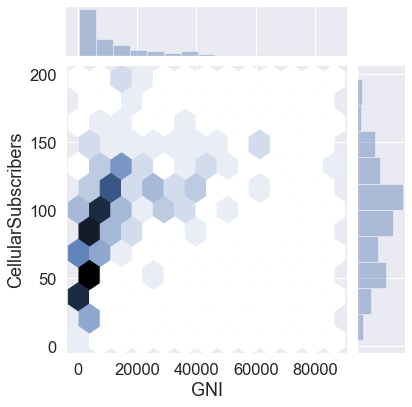

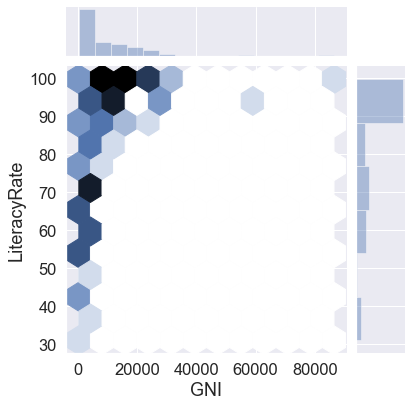

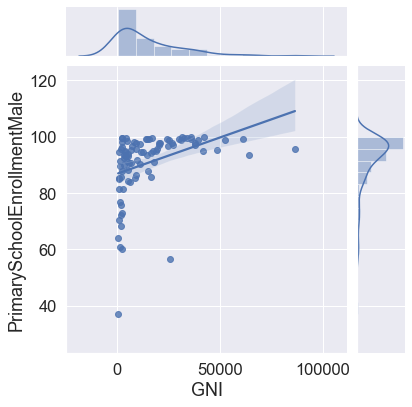

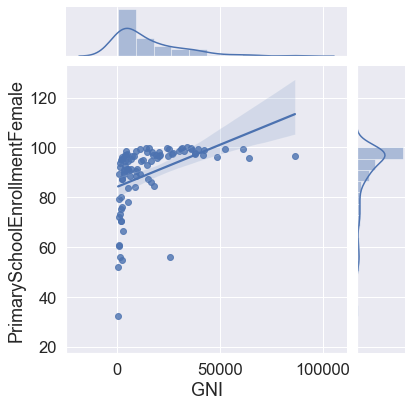

In [9]:
sns.jointplot(x='GNI', y='Population',data=df, kind='scatter')

sns.jointplot(x='GNI', y='Under15',data=df, kind='scatter')

sns.jointplot(x='GNI', y='Over60',data=df, kind='scatter')

sns.jointplot(x='GNI', y='FertilityRate',data=df, kind='scatter')

sns.jointplot(x='GNI', y='LifeExpectancy',data=df, kind='kde')

sns.jointplot(x='GNI', y='ChildMortality',data=df, kind='kde')

sns.jointplot(x='GNI', y='CellularSubscribers',data=df, kind='hex')

sns.jointplot(x='GNI', y='LiteracyRate',data=df, kind='hex')

sns.jointplot(x='GNI', y='PrimarySchoolEnrollmentMale',data=df, kind='reg')

sns.jointplot(x='GNI', y='PrimarySchoolEnrollmentFemale',data=df, kind='reg')


plt.show()

In [10]:
df.corr()

,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
Population,1.000000,-0.059634,0.011693,-0.075156,0.016277,-0.003675,-0.056345,0.035232,-0.033255,-0.024105,-0.076504
Under15,-0.059634,1.000000,-0.829390,0.936096,-0.836467,0.815076,-0.613113,-0.769803,-0.685432,-0.562826,-0.626167
Over60,0.011693,-0.829390,1.000000,-0.699413,0.688129,-0.624303,0.439898,0.596493,0.622878,0.460950,0.508001
FertilityRate,-0.075156,0.936096,-0.699413,1.000000,-0.839840,0.864038,-0.621337,-0.802261,-0.548732,-0.633958,-0.702626
LifeExpectancy,0.016277,-0.836467,0.688129,-0.839840,1.000000,-0.924564,0.623251,0.725924,0.665786,0.630538,0.711334
ChildMortality,-0.003675,0.815076,-0.624303,0.864038,-0.924564,1.000000,-0.637557,-0.779498,-0.544689,-0.602334,-0.729074
CellularSubscribers,-0.056345,-0.613113,0.439898,-0.621337,0.623251,-0.637557,1.000000,0.574928,0.537116,0.545671,0.603955
LiteracyRate,0.035232,-0.769803,0.596493,-0.802261,0.725924,-0.779498,0.574928,1.000000,0.479062,0.537777,0.652675
GNI,-0.033255,-0.685432,0.622878,-0.548732,0.665786,-0.544689,0.537116,0.479062,1.000000,0.378256,0.424768
PrimarySchoolEnrollmentMale,-0.024105,-0.562826,0.460950,-0.633958,0.630538,-0.602334,0.545671,0.537777,0.378256,1.000000,0.942857


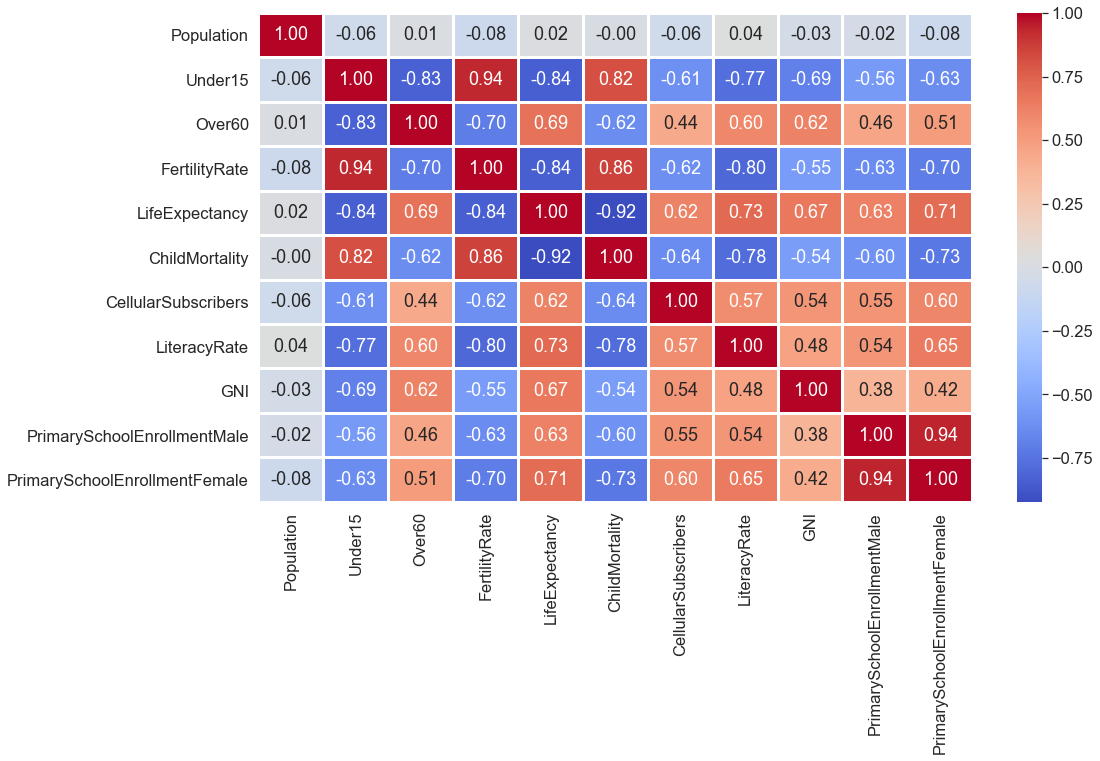

In [11]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

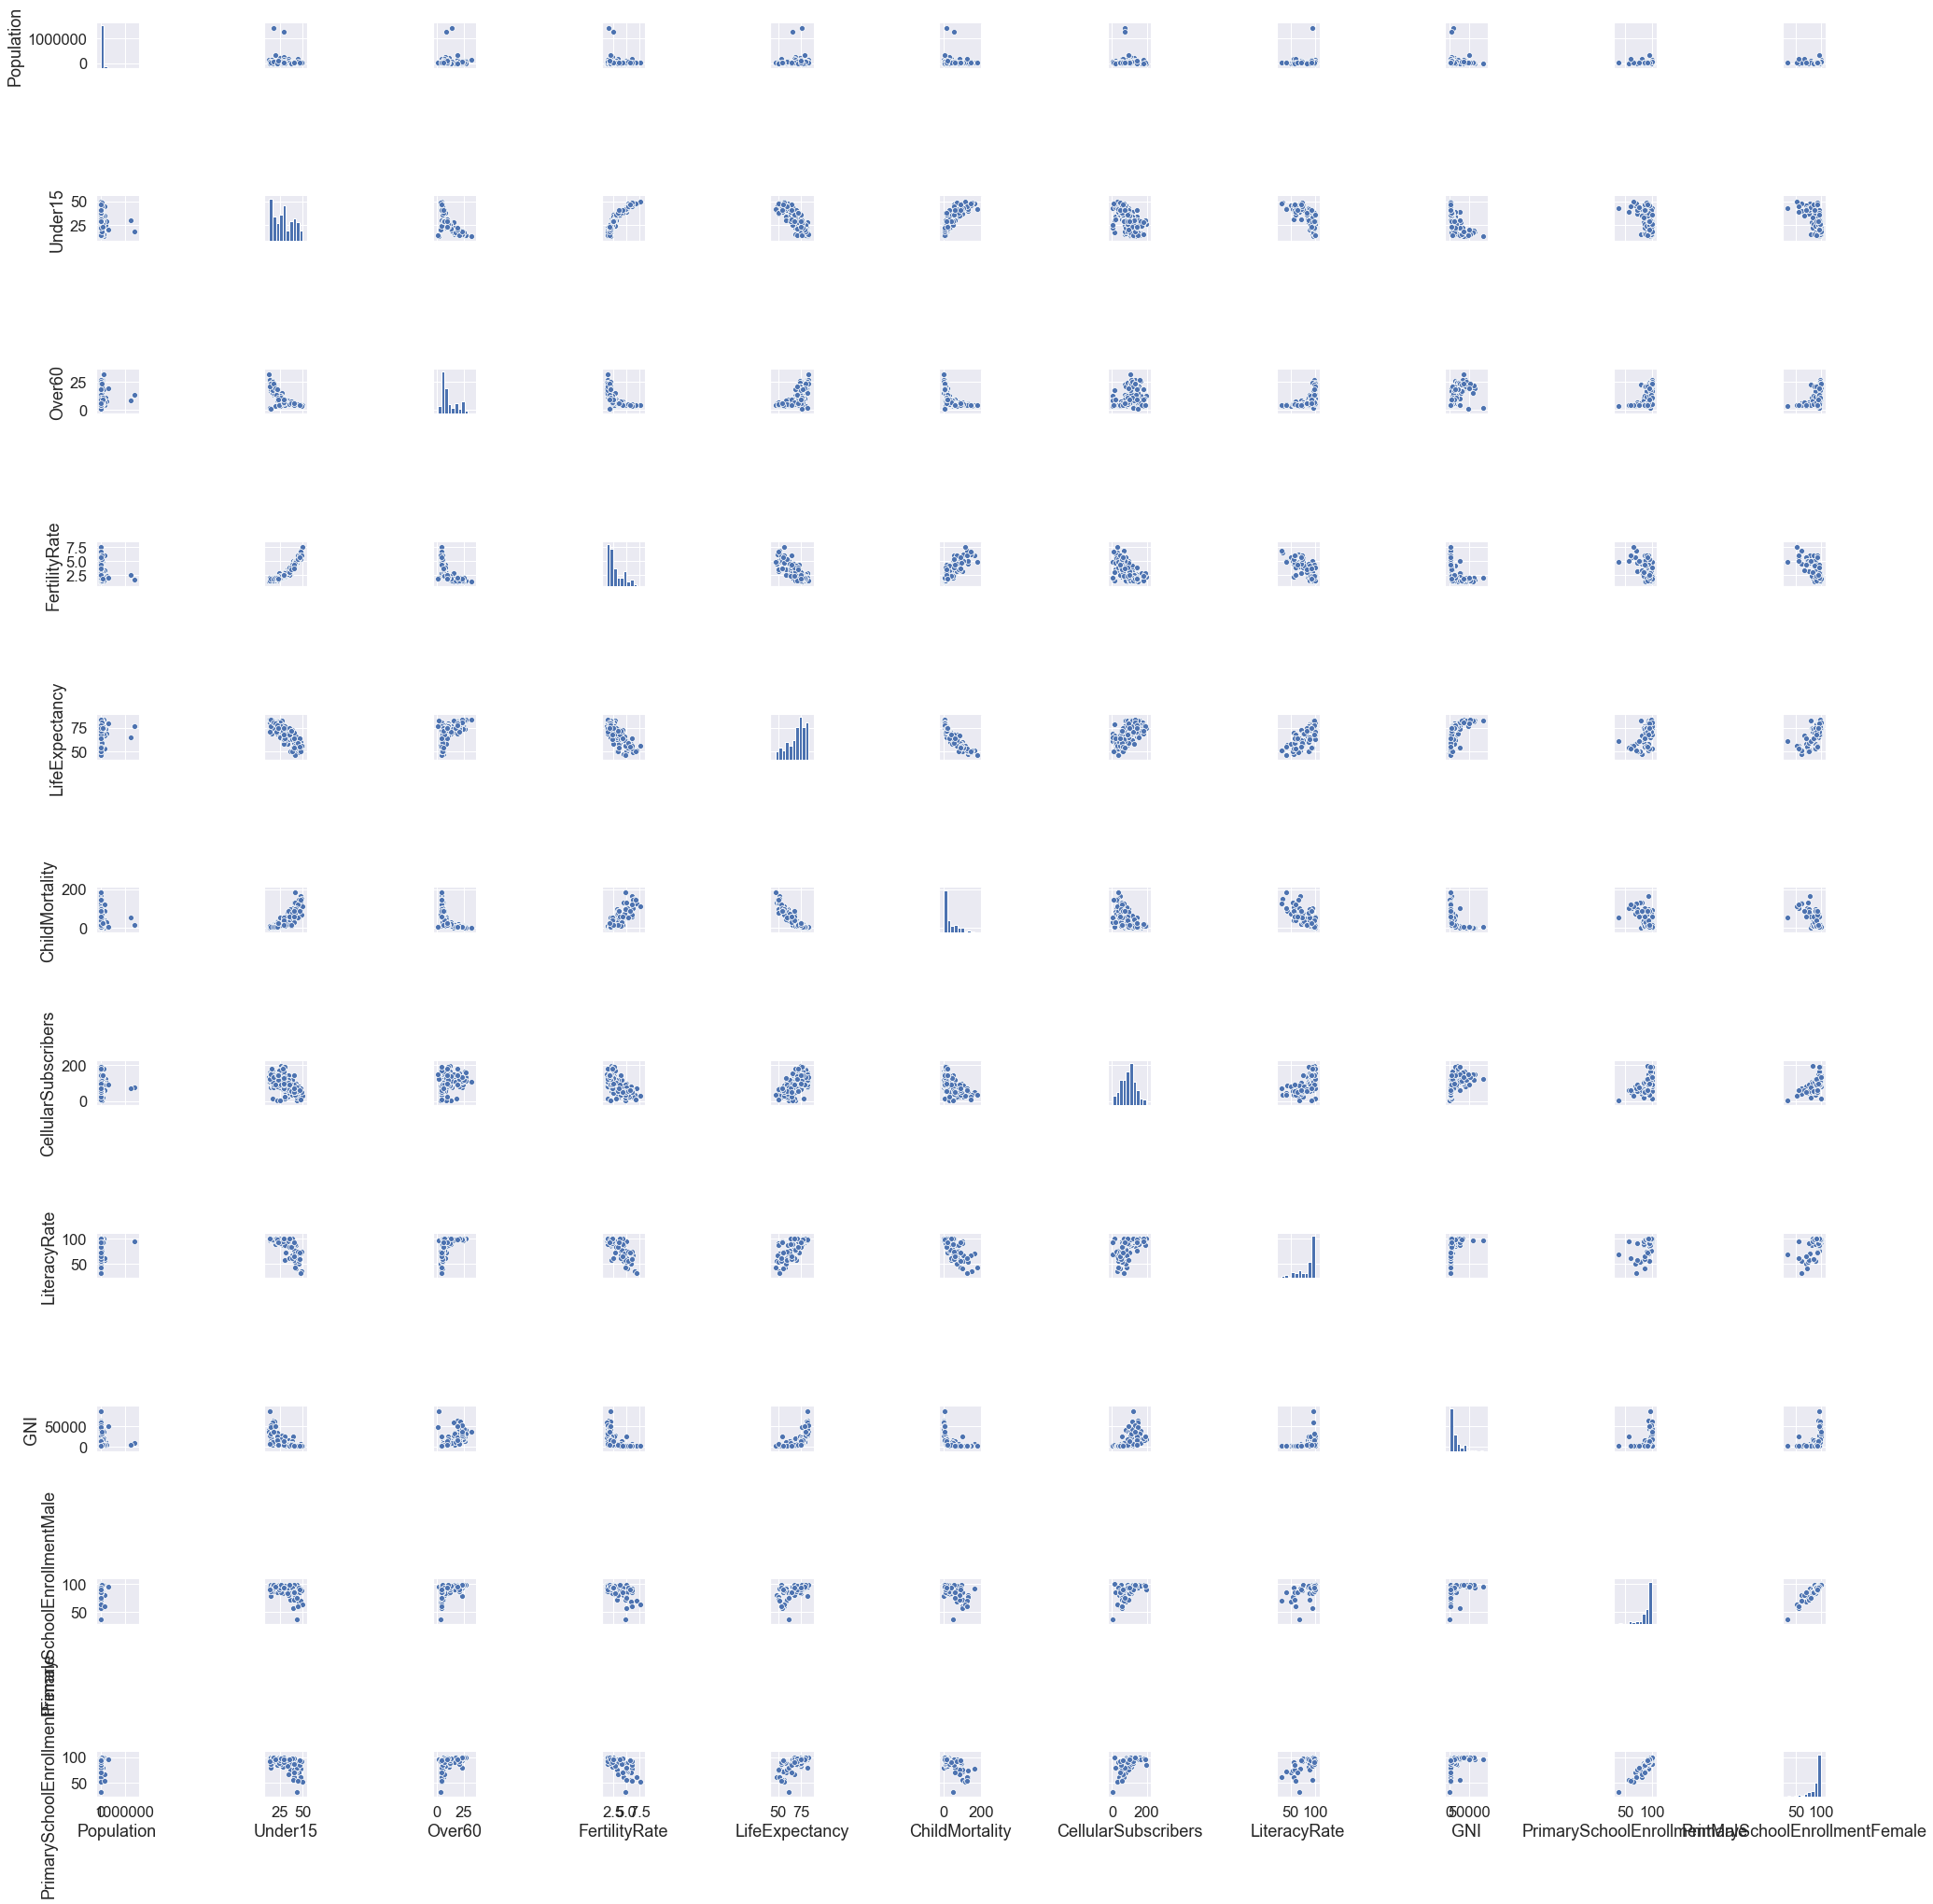

In [12]:
sns.pairplot(df)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [13]:
df.isnull().sum()

Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                    11
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers              10
LiteracyRate                     91
GNI                              32
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64

In [14]:
imputer = mdi.MeanMedianImputer(imputation_method='median',variables=['FertilityRate','CellularSubscribers',
                               'LiteracyRate','GNI','PrimarySchoolEnrollmentMale','PrimarySchoolEnrollmentFemale'])

In [15]:
imputer.fit(df)

MeanMedianImputer(imputation_method='median',
                  variables=['FertilityRate', 'CellularSubscribers',
                             'LiteracyRate', 'GNI',
                             'PrimarySchoolEnrollmentMale',
                             'PrimarySchoolEnrollmentFemale'])

In [16]:
df = imputer.transform(df)

In [17]:
df.isnull().sum()

Country                          0
Region                           0
Population                       0
Under15                          0
Over60                           0
FertilityRate                    0
LifeExpectancy                   0
ChildMortality                   0
CellularSubscribers              0
LiteracyRate                     0
GNI                              0
PrimarySchoolEnrollmentMale      0
PrimarySchoolEnrollmentFemale    0
dtype: int64

### Treat Duplicate Values

In [18]:
df.duplicated(keep='first').sum()

0

### Treat Imbalance Data

### Treat Outliers

In [19]:
df

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,91.8,1140.0,94.7,95.1
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,91.8,8820.0,94.7,95.1
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,91.8,8310.0,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,2.40,82,3.2,75.49,91.8,7870.0,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Venezuela (Bolivarian Republic of),Americas,29955,28.84,9.17,2.44,75,15.3,97.78,91.8,12430.0,94.7,95.1
190,Viet Nam,Western Pacific,90796,22.87,9.32,1.79,75,23.0,143.39,93.2,3250.0,94.7,95.1
191,Yemen,Eastern Mediterranean,23852,40.72,4.54,4.35,64,60.0,47.05,63.9,2170.0,85.5,70.5
192,Zambia,Africa,14075,46.73,3.95,5.77,55,88.5,60.59,71.2,1490.0,91.4,93.9


In [20]:
df.describe()

,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
count,1.940000e+02,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.635997e+04,28.732423,11.163660,2.910000,70.010309,36.148969,93.853041,87.505155,12421.804124,92.695876,92.253608
std,1.379031e+05,10.534573,7.149331,1.443614,9.259075,37.992935,40.323893,13.371642,14023.869561,8.161338,9.624128
min,1.000000e+00,13.120000,0.810000,1.260000,47.000000,2.200000,2.570000,31.100000,340.000000,37.200000,32.500000
25%,1.695750e+03,18.717500,5.200000,1.842500,64.000000,8.425000,66.057500,89.525000,3330.000000,94.625000,94.425000
50%,7.790000e+03,28.650000,8.530000,2.400000,72.500000,18.600000,97.745000,91.800000,7870.000000,94.700000,95.100000
75%,2.453525e+04,37.752500,16.687500,3.767500,76.000000,55.975000,117.980000,92.125000,14617.500000,94.800000,95.325000
max,1.390000e+06,49.990000,31.920000,7.580000,83.000000,181.600000,196.410000,99.800000,86440.000000,100.000000,100.000000


In [21]:
windsorizer = Winsorizer(distribution='skewed',tail='both',fold=1.5,
                         variables=None)

In [22]:
windsorizer.fit(df)

Winsorizer(distribution='skewed', fold=1.5, tail='both',
           variables=['Population', 'Under15', 'Over60', 'FertilityRate',
                      'LifeExpectancy', 'ChildMortality', 'CellularSubscribers',
                      'LiteracyRate', 'GNI', 'PrimarySchoolEnrollmentMale',
                      'PrimarySchoolEnrollmentFemale'])

In [23]:
df2 = windsorizer.transform(df)

In [24]:
df2

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825.0,47.42,3.82,5.40,60.0,98.5,54.26,91.800,1140.0,94.7000,95.100
1,Albania,Europe,3162.0,21.33,14.93,1.75,74.0,16.7,96.39,91.800,8820.0,94.7000,95.100
2,Algeria,Africa,38482.0,27.42,7.17,2.83,73.0,20.0,98.99,91.800,8310.0,95.0625,96.400
3,Andorra,Europe,78.0,15.20,22.86,2.40,82.0,3.2,75.49,91.800,7870.0,94.3625,93.075
4,Angola,Africa,20821.0,47.58,3.84,6.10,51.0,127.3,48.38,85.625,5230.0,94.3625,93.075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Venezuela (Bolivarian Republic of),Americas,29955.0,28.84,9.17,2.44,75.0,15.3,97.78,91.800,12430.0,94.7000,95.100
190,Viet Nam,Western Pacific,58794.5,22.87,9.32,1.79,75.0,23.0,143.39,93.200,3250.0,94.7000,95.100
191,Yemen,Eastern Mediterranean,23852.0,40.72,4.54,4.35,64.0,60.0,47.05,85.625,2170.0,94.3625,93.075
192,Zambia,Africa,14075.0,46.73,3.95,5.77,55.0,88.5,60.59,85.625,1490.0,94.3625,93.900


In [25]:
df2.describe()

,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,16519.786082,28.732423,11.163660,2.903634,70.010309,35.348454,93.850226,91.253222,10894.606959,94.706250,94.975515
std,19697.472476,10.534573,7.149331,1.425256,9.259075,35.602831,40.316713,3.423438,9818.345487,0.244427,1.218287
min,1.000000,13.120000,0.810000,1.260000,47.000000,2.200000,2.570000,85.625000,340.000000,94.362500,93.075000
25%,1695.750000,18.717500,5.200000,1.842500,64.000000,8.425000,66.057500,89.525000,3330.000000,94.625000,94.425000
50%,7790.000000,28.650000,8.530000,2.400000,72.500000,18.600000,97.745000,91.800000,7870.000000,94.700000,95.100000
75%,24535.250000,37.752500,16.687500,3.767500,76.000000,55.975000,117.980000,92.125000,14617.500000,94.800000,95.325000
max,58794.500000,49.990000,31.920000,6.655000,83.000000,127.300000,195.863750,96.025000,31548.750000,95.062500,96.675000


In [26]:
windsorizer.left_tail_caps_

{'Population': -32563.5,
 'Under15': -9.835000000000004,
 'Over60': -12.031250000000004,
 'FertilityRate': -1.0449999999999995,
 'LifeExpectancy': 46.0,
 'ChildMortality': -62.89999999999999,
 'CellularSubscribers': -11.826249999999987,
 'LiteracyRate': 85.62500000000001,
 'GNI': -13601.25,
 'PrimarySchoolEnrollmentMale': 94.36249999999997,
 'PrimarySchoolEnrollmentFemale': 93.075}

In [27]:
windsorizer.right_tail_caps_

{'Population': 58794.5,
 'Under15': 66.305,
 'Over60': 33.91875,
 'FertilityRate': 6.654999999999999,
 'LifeExpectancy': 94.0,
 'ChildMortality': 127.29999999999998,
 'CellularSubscribers': 195.86374999999998,
 'LiteracyRate': 96.02499999999999,
 'GNI': 31548.75,
 'PrimarySchoolEnrollmentMale': 95.06250000000001,
 'PrimarySchoolEnrollmentFemale': 96.67500000000003}

### Treat Data Types

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        194 non-null    object 
 1   Region                         194 non-null    object 
 2   Population                     194 non-null    float64
 3   Under15                        194 non-null    float64
 4   Over60                         194 non-null    float64
 5   FertilityRate                  194 non-null    float64
 6   LifeExpectancy                 194 non-null    float64
 7   ChildMortality                 194 non-null    float64
 8   CellularSubscribers            194 non-null    float64
 9   LiteracyRate                   194 non-null    float64
 10  GNI                            194 non-null    float64
 11  PrimarySchoolEnrollmentMale    194 non-null    float64
 12  PrimarySchoolEnrollmentFemale  194 non-null    flo

### Drop unwanted features

In [29]:
df2.columns

Index(['Country', 'Region', 'Population', 'Under15', 'Over60', 'FertilityRate',
       'LifeExpectancy', 'ChildMortality', 'CellularSubscribers',
       'LiteracyRate', 'GNI', 'PrimarySchoolEnrollmentMale',
       'PrimarySchoolEnrollmentFemale'],
      dtype='object')

In [30]:
df2.drop(['Country', 'Region'],axis=1,inplace=True)

In [31]:
df2

,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,29825.0,47.42,3.82,5.40,60.0,98.5,54.26,91.800,1140.0,94.7000,95.100
1,3162.0,21.33,14.93,1.75,74.0,16.7,96.39,91.800,8820.0,94.7000,95.100
2,38482.0,27.42,7.17,2.83,73.0,20.0,98.99,91.800,8310.0,95.0625,96.400
3,78.0,15.20,22.86,2.40,82.0,3.2,75.49,91.800,7870.0,94.3625,93.075
4,20821.0,47.58,3.84,6.10,51.0,127.3,48.38,85.625,5230.0,94.3625,93.075
...,...,...,...,...,...,...,...,...,...,...,...
189,29955.0,28.84,9.17,2.44,75.0,15.3,97.78,91.800,12430.0,94.7000,95.100
190,58794.5,22.87,9.32,1.79,75.0,23.0,143.39,93.200,3250.0,94.7000,95.100
191,23852.0,40.72,4.54,4.35,64.0,60.0,47.05,85.625,2170.0,94.3625,93.075
192,14075.0,46.73,3.95,5.77,55.0,88.5,60.59,85.625,1490.0,94.3625,93.900


In [32]:
df2 = df2[['Population', 'Under15', 'Over60', 'FertilityRate',
       'LifeExpectancy', 'ChildMortality', 'CellularSubscribers',
       'LiteracyRate', 'PrimarySchoolEnrollmentMale', 'PrimarySchoolEnrollmentFemale', 'GNI' ]]

In [33]:
df2

,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale,GNI
0,29825.0,47.42,3.82,5.40,60.0,98.5,54.26,91.800,94.7000,95.100,1140.0
1,3162.0,21.33,14.93,1.75,74.0,16.7,96.39,91.800,94.7000,95.100,8820.0
2,38482.0,27.42,7.17,2.83,73.0,20.0,98.99,91.800,95.0625,96.400,8310.0
3,78.0,15.20,22.86,2.40,82.0,3.2,75.49,91.800,94.3625,93.075,7870.0
4,20821.0,47.58,3.84,6.10,51.0,127.3,48.38,85.625,94.3625,93.075,5230.0
...,...,...,...,...,...,...,...,...,...,...,...
189,29955.0,28.84,9.17,2.44,75.0,15.3,97.78,91.800,94.7000,95.100,12430.0
190,58794.5,22.87,9.32,1.79,75.0,23.0,143.39,93.200,94.7000,95.100,3250.0
191,23852.0,40.72,4.54,4.35,64.0,60.0,47.05,85.625,94.3625,93.075,2170.0
192,14075.0,46.73,3.95,5.77,55.0,88.5,60.59,85.625,94.3625,93.900,1490.0


### Train Test Split

In [34]:
df2.shape

(194, 11)

In [35]:
X = df2.iloc[:,0:10]
y = df2.iloc[:,10]

In [36]:
X.values, y.values

(array([[2.98250e+04, 4.74200e+01, 3.82000e+00, ..., 9.18000e+01,
         9.47000e+01, 9.51000e+01],
        [3.16200e+03, 2.13300e+01, 1.49300e+01, ..., 9.18000e+01,
         9.47000e+01, 9.51000e+01],
        [3.84820e+04, 2.74200e+01, 7.17000e+00, ..., 9.18000e+01,
         9.50625e+01, 9.64000e+01],
        ...,
        [2.38520e+04, 4.07200e+01, 4.54000e+00, ..., 8.56250e+01,
         9.43625e+01, 9.30750e+01],
        [1.40750e+04, 4.67300e+01, 3.95000e+00, ..., 8.56250e+01,
         9.43625e+01, 9.39000e+01],
        [1.37240e+04, 4.02400e+01, 5.68000e+00, ..., 9.22000e+01,
         9.47000e+01, 9.51000e+01]]),
 array([ 1140.  ,  8820.  ,  8310.  ,  7870.  ,  5230.  , 17900.  ,
        17130.  ,  6100.  , 31548.75, 31548.75,  8960.  ,  7870.  ,
         7870.  ,  1940.  ,  7870.  , 14460.  , 31548.75,  6090.  ,
         1620.  ,  5570.  ,  4890.  ,  9190.  , 14550.  , 11420.  ,
         7870.  , 14160.  ,  1300.  ,   610.  ,  2230.  ,  2330.  ,
        31548.75,  3980.  ,   810

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((155, 10), (39, 10), (155,), (39,))

### Feature Scaling

In [39]:
X_train

,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
55,736.0,38.95,4.53,5.04,54.0,100.3,59.15,93.900,94.3625,93.075
162,21098.0,25.15,12.40,2.35,75.0,9.6,87.05,91.200,94.3625,94.400
138,49003.0,15.25,16.58,1.29,81.0,3.8,108.50,91.800,95.0625,96.675
8,23050.0,18.95,19.46,1.89,82.0,4.9,108.34,91.800,95.0625,96.675
129,21.0,30.10,8.84,2.40,72.0,20.8,74.94,91.800,94.7000,95.100
...,...,...,...,...,...,...,...,...,...,...
103,338.0,29.03,6.65,2.31,77.0,10.5,165.72,91.800,95.0625,96.500
67,11125.0,14.60,25.41,1.51,81.0,4.8,106.48,96.025,95.0625,96.675
117,2259.0,36.59,5.38,3.17,65.0,38.7,96.39,88.800,94.3625,93.075
47,58794.5,45.11,4.51,6.15,49.0,127.3,23.09,85.625,94.7000,95.100


In [40]:
minmax = MinMaxScaler()

In [41]:
X_train_scaled = minmax.fit_transform(X_train)

In [42]:
X_test_scaled = minmax.transform(X_test)

In [43]:
X_train_scaled

array([[0.01235019, 0.75306122, 0.09274594, ..., 0.79567308, 0.        ,
        0.        ],
       [0.35873402, 0.35072886, 0.35342829, ..., 0.53605769, 0.        ,
        0.36805556],
       [0.83343398, 0.06209913, 0.49188473, ..., 0.59375   , 1.        ,
        1.        ],
       ...,
       [0.03825838, 0.68425656, 0.12090096, ..., 0.30528846, 0.        ,
        0.        ],
       [1.        , 0.93265306, 0.09208347, ..., 0.        , 0.48214286,
        0.5625    ],
       [0.01878046, 0.96822157, 0.11361378, ..., 0.        , 0.        ,
        0.        ]])

In [44]:
X_test_scaled

array([[ 1.03938964e-02,  1.71720117e-01,  5.58131832e-01,
         7.97034291e-02,  8.05555556e-01,  2.95763389e-02,
         5.11611030e-01,  1.00000000e+00,  4.82142857e-01,
         5.62500000e-01],
       [ 8.12680213e-01,  9.25072886e-01,  1.04670421e-01,
         7.59962929e-01,  3.33333333e-01,  4.14068745e-01,
         2.84685266e-01,  0.00000000e+00,  4.82142857e-01,
         5.62500000e-01],
       [ 1.04126088e-01,  8.74052478e-01,  6.62471017e-02,
         6.70991659e-01,  3.88888889e-01,  3.96482814e-01,
         1.02134064e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.54802712e-03,  4.95043732e-01,  2.35508447e-01,
         3.24374421e-01,  5.55555556e-01,  4.61231015e-01,
         5.95065312e-02,  5.93750000e-01,  4.82142857e-01,
         5.62500000e-01],
       [ 2.22507634e-02,  2.05247813e-01,  5.46538589e-02,
         1.59406858e-01,  8.88888889e-01,  5.91526779e-02,
         6.74031070e-01,  6.03365385e-01,  4.82142857e-01,
         5.

### Create and save processed dataset

In [45]:
#df2.to_csv("whotrain.csv",index=False)

### Model Training

### Using XGBoost

In [46]:
xgbmodel = XGBRegressor(random_state=0, n_estimators=100, objective='reg:squarederror')

In [47]:
xgbmodel.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='rmse',early_stopping_rounds=10)

[0]	validation_0-rmse:12372.6
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:11466.2
[2]	validation_0-rmse:10826.1
[3]	validation_0-rmse:10161
[4]	validation_0-rmse:9549.85
[5]	validation_0-rmse:9072.37
[6]	validation_0-rmse:8641.37
[7]	validation_0-rmse:8265.02
[8]	validation_0-rmse:7926.08
[9]	validation_0-rmse:7618.45
[10]	validation_0-rmse:7345.71
[11]	validation_0-rmse:7118.02
[12]	validation_0-rmse:6870.81
[13]	validation_0-rmse:6772.08
[14]	validation_0-rmse:6663.88
[15]	validation_0-rmse:6567.08
[16]	validation_0-rmse:6436.52
[17]	validation_0-rmse:6351.8
[18]	validation_0-rmse:6308.22
[19]	validation_0-rmse:6240.14
[20]	validation_0-rmse:6172.69
[21]	validation_0-rmse:6153.42
[22]	validation_0-rmse:6077
[23]	validation_0-rmse:6006.67
[24]	validation_0-rmse:5932.46
[25]	validation_0-rmse:5903.05
[26]	validation_0-rmse:5831.93
[27]	validation_0-rmse:5809.4
[28]	validation_0-rmse:5800.43
[29]	validation_0-rmse:5766.83
[30]	validation_0-rmse

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [48]:
y_pred = xgbmodel.predict(X_test_scaled)

In [49]:
y_pred

array([10770.653 ,  1587.8921,  2791.1501,  7071.1104, 11152.131 ,
        6165.1665,  2103.6104,  7737.218 ,  1303.783 ,  8946.739 ,
       17850.043 ,  4297.7915,  4205.8867, 10038.249 ,  5079.8984,
        2210.9321, 12737.333 ,  1315.7314, 18979.92  ,  4368.0557,
       12615.004 , 12810.856 , 12144.706 , 10002.57  ,  2937.0076,
        7403.326 ,  4198.636 , 22836.541 ,  5614.015 , 28880.5   ,
       15883.33  , 26912.004 ,  5090.4634,  1315.7314, 31777.61  ,
        3402.545 ,  4342.5024,  4534.367 ,  3321.7124], dtype=float32)

In [50]:
y_test.to_numpy()

array([13700.  ,  1500.  ,   580.  ,  3300.  ,  7870.  ,  1110.  ,
        1620.  ,  7870.  ,  2120.  ,  6100.  , 17900.  ,   720.  ,
        7870.  ,  7870.  ,  3820.  ,  1360.  ,  9030.  ,  1310.  ,
       31548.75,  1240.  , 24700.  , 22130.  , 16940.  , 14330.  ,
        2570.  ,  7870.  ,  8690.  , 24370.  , 14550.  , 31548.75,
       19640.  ,  7870.  ,  3730.  ,  5230.  , 31548.75,  7870.  ,
        2580.  ,  2300.  ,  1300.  ])

### Model Evaluation

In [51]:
mse = mean_squared_error(y_test,y_pred)
mse

28162471.34382127

In [52]:
rmse = np.sqrt(mse)
rmse

5306.832515146984

In [53]:
r2score = r2_score(y_test,y_pred)
r2score

0.6712770021040597

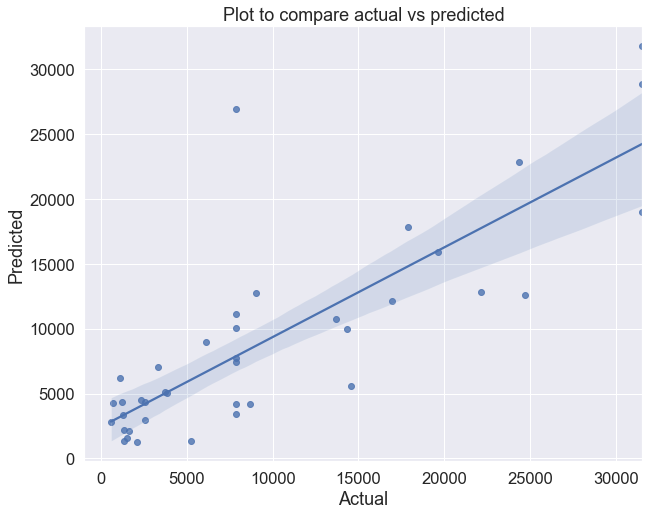

In [54]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

In [55]:
X.columns

Index(['Population', 'Under15', 'Over60', 'FertilityRate', 'LifeExpectancy',
       'ChildMortality', 'CellularSubscribers', 'LiteracyRate',
       'PrimarySchoolEnrollmentMale', 'PrimarySchoolEnrollmentFemale'],
      dtype='object')

In [56]:
xgbmodel.get_booster().feature_names = ['Population', 'Under15', 'Over60', 'FertilityRate', 'LifeExpectancy',
       'ChildMortality', 'CellularSubscribers', 'LiteracyRate',
       'PrimarySchoolEnrollmentMale', 'PrimarySchoolEnrollmentFemale']

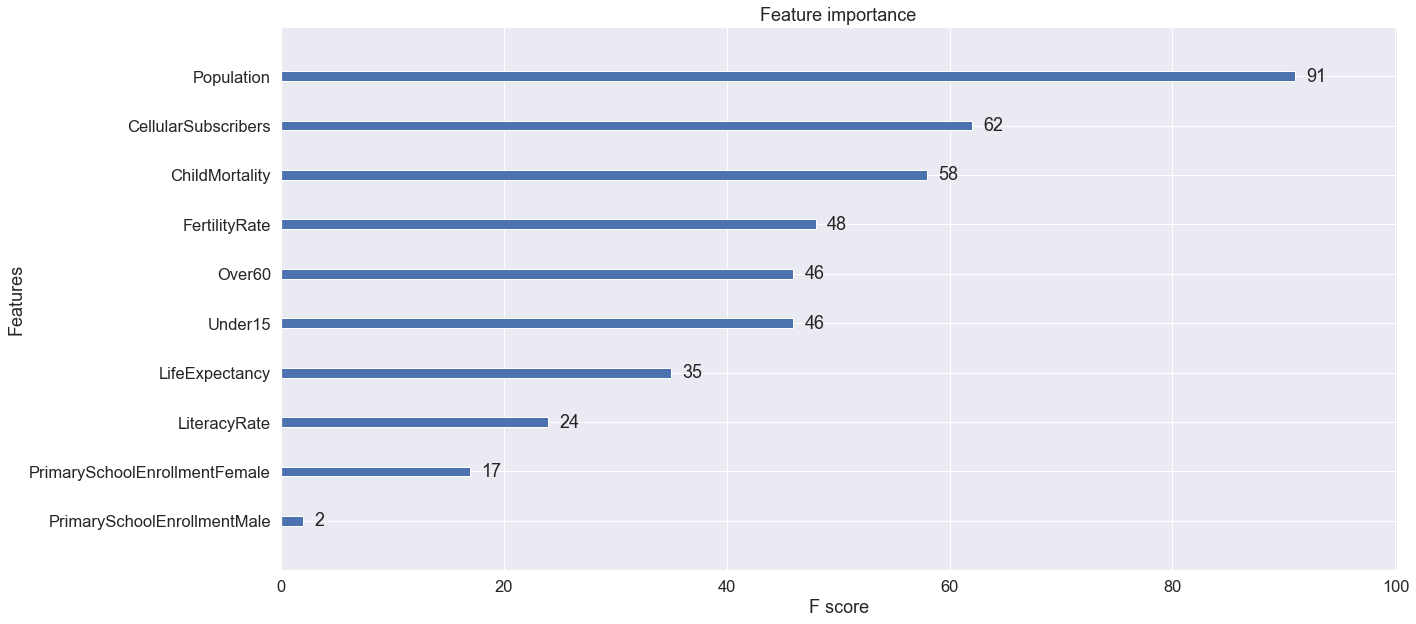

In [57]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax)
plt.show()

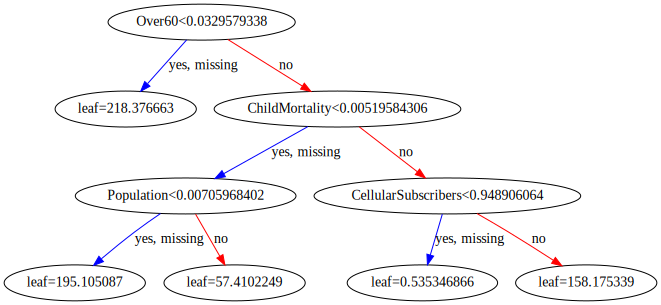

In [58]:
xgb.to_graphviz(xgbmodel,num_trees=50)

### Cross-Validation

In [59]:
cv = cross_val_score(xgbmodel,X,y,cv=5,verbose=1,scoring='r2')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [60]:
cv.mean()

0.7449712447671386